# 0.Import packages

## 0.0 Import common python packges

In [28]:
### INTRODUCTION                       ###
### AUTHOR: Martin Jin                 ###
### Date: 20210127                     ###

#A Method to summarize electrochemistry, CO2 and flow meter data.
#enter folder/file path to start
#for 20210107 data



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import csv
import sys
import glob
from matplotlib.ticker import MultipleLocator
from scipy.fft import fft,ifft
import pickle
from scipy.signal import lfilter,savgol_filter
from scipy.optimize import fsolve,root_scalar,ridder,anderson,newton_krylov

#set minor ticks
ml = MultipleLocator(5)
#A Method to summarize electrochemistry, CO2 and flow meter data.


## 0.1 Import packages from co2_project_methods

In [ ]:



import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../')

#import all custom function modules
import echem_methods
import gas_methods
import utils
import calc_dic
import plotting

# 1.Data

## 1.0 Import Echem Data

In [2]:
#Import and Process Echem Data
electrochem_path_40mA = 'Electrochemistry/20210211 3hr_switch 40mAcm2 right CO2 test/'
echem_40_ma_dict = echem_methods.create_echem_dfs(electrochem_path_40mA,co2=True,cycle_number=5,outgas_time=163)
echem_40_ma_energy_df = echem_40_ma_dict['energy_df']
echem_40_df = echem_40_ma_dict['echem_df']
time_40_df = echem_40_ma_dict['time_df']

In [9]:
echem_40_df.head()

,Time,Voltage,Current,pH_left,pH_right,fitted_pH_left,fitted_pH_right,Delta_T_s,Time_Delta,Hours
0,2021-02-11 16:19:36,0.603859,0.199853,8.897782,6.418614,9.215425,6.321130,1.0,1.000278,0.000000
1,2021-02-11 16:19:37,0.726290,0.199854,9.859904,6.428022,9.221637,6.335298,2.0,1.000556,0.000278
2,2021-02-11 16:19:38,0.797950,0.199854,9.248463,6.428972,9.227791,6.349404,3.0,1.000833,0.000556
3,2021-02-11 16:19:39,0.837222,0.199854,9.010238,6.430870,9.233886,6.363450,4.0,1.001111,0.000833
4,2021-02-11 16:19:40,0.861303,0.199854,9.240014,6.439076,9.239923,6.377435,5.0,1.001389,0.001111


## 1.1 Import Gas Data

In [3]:

#Import and Process Gas Data
gas_df=pd.read_csv("CO2Flow/20210211_Full_cell_right_CO2_3hr_switch_cycling_left_peristaltic_pump_additional_390mgDSPZ.txt",header=0)
gas_df['Datetime']=(gas_df['date']+gas_df['time']).astype(echem_40_df['Time'].dtype)

In [8]:
gas_df.head()

,date,time,loop_num,N2 input left(abs val),N2 input right(abs val),CO2 input left(abs val),CO2 input right(abs val),flow sensor left(sccm),flow sensor right(sccm),CO2 sensor left(abs val),CO2 sensor right(abs val),Datetime,Time_Delta
0,02/11/2021,15:19:35,0,100,50,0,50,19.54,2.90,6.0,556.0,2021-02-11 15:19:35,0.000000
1,02/11/2021,15:19:36,0,100,50,0,50,19.42,2.54,7.0,552.0,2021-02-11 15:19:36,0.000278
2,02/11/2021,15:19:37,0,100,50,0,50,15.38,3.27,8.0,553.0,2021-02-11 15:19:37,0.000556
3,02/11/2021,15:19:38,0,100,50,0,50,28.71,1.56,9.0,547.0,2021-02-11 15:19:38,0.000833
4,02/11/2021,15:19:39,0,100,50,0,50,20.64,2.90,5.0,546.0,2021-02-11 15:19:39,0.001111


## 1.2 Combine Data

In [6]:

#Combine Data 
total_df = utils.merge_echem_gas_df(echem_40_df,gas_df,co2_fit_path = '20210103_right_CO2_sensor_cubic_spline_fit')

change_gas_df = gas_methods.find_gas_change_time(gas_df,gas_switch_period=10800)




In [10]:
total_df.head()

,date,time,loop_num,N2 input left(abs val),N2 input right(abs val),CO2 input left(abs val),CO2 input right(abs val),flow sensor left(sccm),flow sensor right(sccm),CO2 sensor left(abs val),...,Current,pH_left,pH_right,fitted_pH_left,fitted_pH_right,Delta_T_s,Hours,right_pco2,Corrected_Flow_Right,Corrected_Flow_Right_filtered
0,02/11/2021,15:19:35,0.0,100.0,50.0,0.0,50.0,19.54,2.90,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.98650,0.036107
1,02/11/2021,15:19:36,0.0,100.0,50.0,0.0,50.0,19.42,2.54,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.73990,0.067464
2,02/11/2021,15:19:37,0.0,100.0,50.0,0.0,50.0,15.38,3.27,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.23995,0.107589
3,02/11/2021,15:19:38,0.0,100.0,50.0,0.0,50.0,28.71,1.56,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.06860,0.126353
4,02/11/2021,15:19:39,0.0,100.0,50.0,0.0,50.0,20.64,2.90,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.98650,0.161384


In [12]:
change_gas_df

,Cycle,low_to_high,high_to_low
0,1,2021-02-11 18:20:02,2021-02-11 21:20:28
1,2,2021-02-12 00:20:55,2021-02-12 03:21:22
2,3,2021-02-12 06:21:48,2021-02-12 09:22:15
3,4,2021-02-12 12:22:41,2021-02-12 15:23:08
4,5,2021-02-12 18:23:34,2021-02-12 21:24:01
5,6,2021-02-13 00:24:27,NaT


## 2.Calculation

### 2.0 Calculate amount of CO2 captured and released for each cycle

In [23]:
amount_3000Baseline_df = gas_methods.calculate_amount(total_df,time_40_df,change_gas_df,capture_parameter = 'Corrected_Flow_Right',baseline_range=3000)


In [24]:
amount_3000Baseline_df

,Cycle_Number,Capture_Amount,Outgas_Amount,Average_Amount,c0,c1,o0,o1,c_start,c_end,o_start,o_end
0,1,-59.360046,45.428678,52.394362,0.003741,10.889300,-0.025314,10.154904,3591,10802,14451,21604
1,2,-53.423953,47.242824,50.333389,0.015037,10.713154,-0.052972,10.612816,25262,32406,36095,43208
2,3,-50.176936,45.080388,47.628662,-0.004292,10.861044,-0.027326,10.494254,46900,54009,57686,64811
3,4,-50.915158,45.390502,48.152830,0.013501,10.507792,-0.045379,11.072978,68459,75612,79291,86414
4,5,-51.009255,45.919220,48.464237,0.026548,10.114267,-0.039299,11.186749,90083,97215,100879,108017


### 2.1 Calculate DIC according to total_df, ehcem_time_df and change_gas_df

In [14]:
dic_df = calc_dic.calc_DIC(total_df,time_40_df,change_gas_df)


In [7]:
dic_df

,Cycle,State,pH_measured,pH_theory,TA,DIC_TA,DIC_eq,DIC_theory,index
0,1,3'i,6.418614,6.418614,0.050580,0.068026,0.068026,0.068026,3592
1,1,1,7.505919,6.851640608245976,0.275185,0.279265,1.285404,0.309388,10802
2,1,1',7.245702,6.851308386628657,0.274973,0.287011,0.717789,0.309177,14451
3,1,3,6.462063,6.5362073280691195,0.066353,0.087041,0.073348,0.083760,21604
4,1,3'f,6.733489,6.536193931393215,0.066351,0.077297,0.121944,0.083758,25239
5,2,3'i,6.736348,6.736348,0.105370,0.122635,0.122635,0.122635,25263
6,2,1,7.340558,6.92140707111922,0.323466,0.333799,0.885945,0.357367,32406
7,2,1',7.170335,6.9200101427109,0.322421,0.340051,0.608355,0.356329,36095
8,2,3,6.308327,6.776578093885727,0.115646,0.167154,0.056685,0.132864,43208
9,2,3'f,6.588679,6.776558678328582,0.115640,0.142474,0.092283,0.132859,46878


## 3.Plotting

### 3.0 Plot all gas and echem data

Text(0.5, 0, 'Time (Hours)')

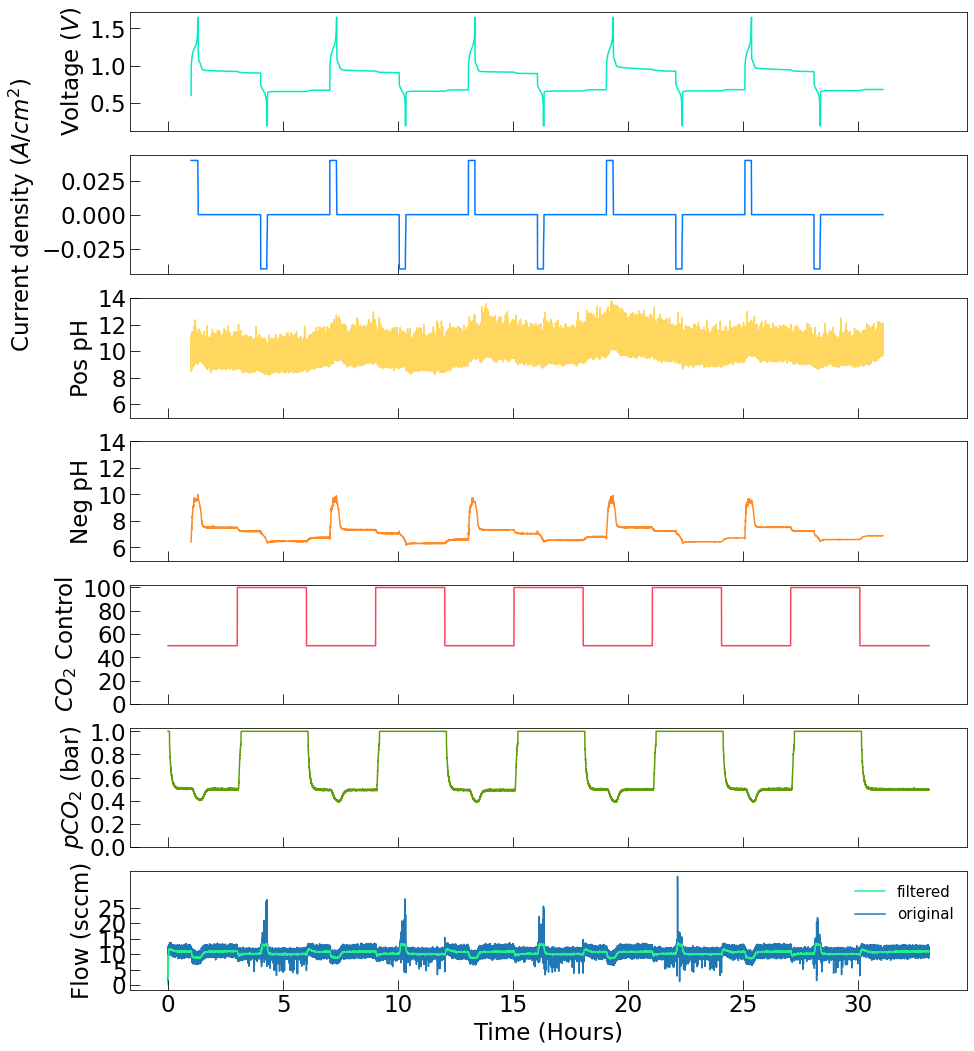

In [16]:

size=23

fig,ax = plt.subplots(7,1,figsize =(15,18),sharex=True,gridspec_kw={'hspace': 0.2})


#ax[0].set_xlabel("Date Time (Day Hour:Minute)",fontsize = 25)
ax[0].plot(total_df.Time_Delta,total_df.Voltage,color='#00ECC2')
ax[0].set_ylabel("",fontsize = size)
#ax[0].set_xlim(starting_time-delta,ending_time-delta)
ax[0].tick_params(axis='x', rotation=45)
ax[0].xaxis.set_tick_params(labelsize=size)
ax[0].yaxis.set_tick_params(labelsize=size)
#ax[0].set_ylim(-10,110)
#ax[0].set_xlabel("Time (Time)",fontsize = 25)
ax[0].set_ylabel("Voltage ($V$)",fontsize = size)
ax[0].tick_params(axis='x',which='minor',direction='in',length=6)
ax[0].tick_params(axis='x',which='major',direction='in',length=10)

ax[0].tick_params(axis='y',which='minor',direction='in',length=6)
ax[0].tick_params(axis='y',which='major',direction='in',length=10)


ax[1].plot(total_df.Time_Delta,total_df.Current/5,color="#0078FF")
ax[1].set_ylabel("",fontsize = size)
#ax[1].set_xlim(starting_time-delta,ending_time-delta)
ax[1].tick_params(axis='x', rotation=45)
ax[1].xaxis.set_tick_params(labelsize=size)
ax[1].yaxis.set_tick_params(labelsize=size)
#ax[0].set_ylim(-10,110)
#ax[1].set_xlabel("Time (Time)",fontsize = 25)
ax[1].set_ylabel("Current density ($A/cm^{2}$)",fontsize = size)
ax[1].tick_params(axis='x',which='minor',direction='in',length=6)
ax[1].tick_params(axis='x',which='major',direction='in',length=10)

ax[1].tick_params(axis='y',which='minor',direction='in',length=6)
ax[1].tick_params(axis='y',which='major',direction='in',length=10)

ax[2].plot(total_df.Time_Delta,total_df.pH_left,color='#FFD75F')
ax[2].set_ylabel("",fontsize = size)
#ax[2].set_xlim(starting_time-delta,ending_time-delta)
ax[2].tick_params(axis='x', rotation=45)
ax[2].xaxis.set_tick_params(labelsize=size)
ax[2].yaxis.set_tick_params(labelsize=size)
ax[2].set_ylim(5,14)
#ax[2].set_xlabel("Time(Time)",fontsize = 25)
ax[2].set_ylabel("Pos pH",fontsize = size)
ax[2].tick_params(axis='y',direction='in')
ax[2].tick_params(axis='x',which='both',direction='in')
ax[2].set_yticks([6,8,10,12,14])
ax[2].tick_params(axis='x',which='minor',direction='in',length=6)
ax[2].tick_params(axis='x',which='major',direction='in',length=10)

ax[2].tick_params(axis='y',which='minor',direction='in',length=6)
ax[2].tick_params(axis='y',which='major',direction='in',length=10)


ax[3].plot(total_df.Time_Delta,total_df.pH_right,color='#FF8A25')
ax[3].set_ylabel("",fontsize = size)
#ax[3].tick_params(axis='x', rotation=45)
ax[3].xaxis.set_tick_params(labelsize=size)
ax[3].yaxis.set_tick_params(labelsize=size)
ax[3].set_ylim(5,14)
ax[3].set_ylabel("Neg pH",fontsize = size)
ax[3].tick_params(axis='y',direction='in')
ax[3].tick_params(axis='x',which='both',direction='in')
ax[3].set_yticks([6,8,10,12,14])
ax[3].tick_params(axis='x',which='minor',direction='in',length=6)
ax[3].tick_params(axis='x',which='major',direction='in',length=10)

ax[3].tick_params(axis='y',which='minor',direction='in',length=6)
ax[3].tick_params(axis='y',which='major',direction='in',length=10)

ax[4].plot(total_df.Time_Delta,total_df['CO2 input right(abs val)'],color='#FF4359')
#ax[3].tick_params(axis='x', rotation=45)
ax[4].xaxis.set_tick_params(labelsize=size)
ax[4].yaxis.set_tick_params(labelsize=size)
ax[4].set_ylabel("$CO_2$ Control",fontsize = size)
ax[4].tick_params(axis='y',direction='in')
ax[4].set_yticks([0,20,40,60,80,100])

ax[4].tick_params(axis='x',which='both',direction='in')
ax[4].tick_params(axis='x',which='minor',direction='in',length=6)
ax[4].tick_params(axis='x',which='major',direction='in',length=10)

ax[4].tick_params(axis='y',which='minor',direction='in',length=6)
ax[4].tick_params(axis='y',which='major',direction='in',length=10)

ax[5].plot(total_df.Time_Delta,total_df['right_pco2'],color='#639C0A')
#ax[3].tick_params(axis='x', rotation=45)
ax[5].xaxis.set_tick_params(labelsize=size)
ax[5].yaxis.set_tick_params(labelsize=size)
ax[5].set_ylabel("$pCO_2$ (bar)",fontsize = size)
ax[5].tick_params(axis='y',direction='in')
ax[5].set_yticks([0,0.2,0.4,0.6,0.8,1.0])

ax[5].tick_params(axis='x',which='both',direction='in')
ax[5].tick_params(axis='x',which='minor',direction='in',length=6)
ax[5].tick_params(axis='x',which='major',direction='in',length=10)

ax[5].tick_params(axis='y',which='minor',direction='in',length=6)
ax[5].tick_params(axis='y',which='major',direction='in',length=10)


n = 80  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
#filtered_right = lfilter(b,a,total_df['flow sensor right(sccm)'])
#total_df['right_pco2'] = total_df['right_pco2'].apply(lambda x: np.where(x>0.9,1,x))
ax[6].plot(total_df.Time_Delta,total_df.Corrected_Flow_Right_filtered,color='#22F08A',zorder=1,label='filtered')
ax[6].plot(total_df.Time_Delta,total_df.Corrected_Flow_Right,zorder=0,label='original')

#ax[6].tick_params(axis='x', rotation=45)
ax[6].xaxis.set_tick_params(labelsize=size)
ax[6].yaxis.set_tick_params(labelsize=size)
ax[6].set_ylabel("Flow (sccm)",fontsize = size)
ax[6].tick_params(axis='y',direction='in')
ax[6].set_yticks([0,5,10,15,20,25])
ax[6].legend(frameon=False,fontsize=15)
ax[6].tick_params(axis='x',which='both',direction='in')
ax[6].tick_params(axis='x',which='minor',direction='in',length=6)
ax[6].tick_params(axis='x',which='major',direction='in',length=10)

ax[6].tick_params(axis='y',which='minor',direction='in',length=6)
ax[6].tick_params(axis='y',which='major',direction='in',length=10)

plt.xlabel('Time (Hours)',fontsize=size)

### 3.1 plot each echem process' start and end time

No handles with labels found to put in legend.


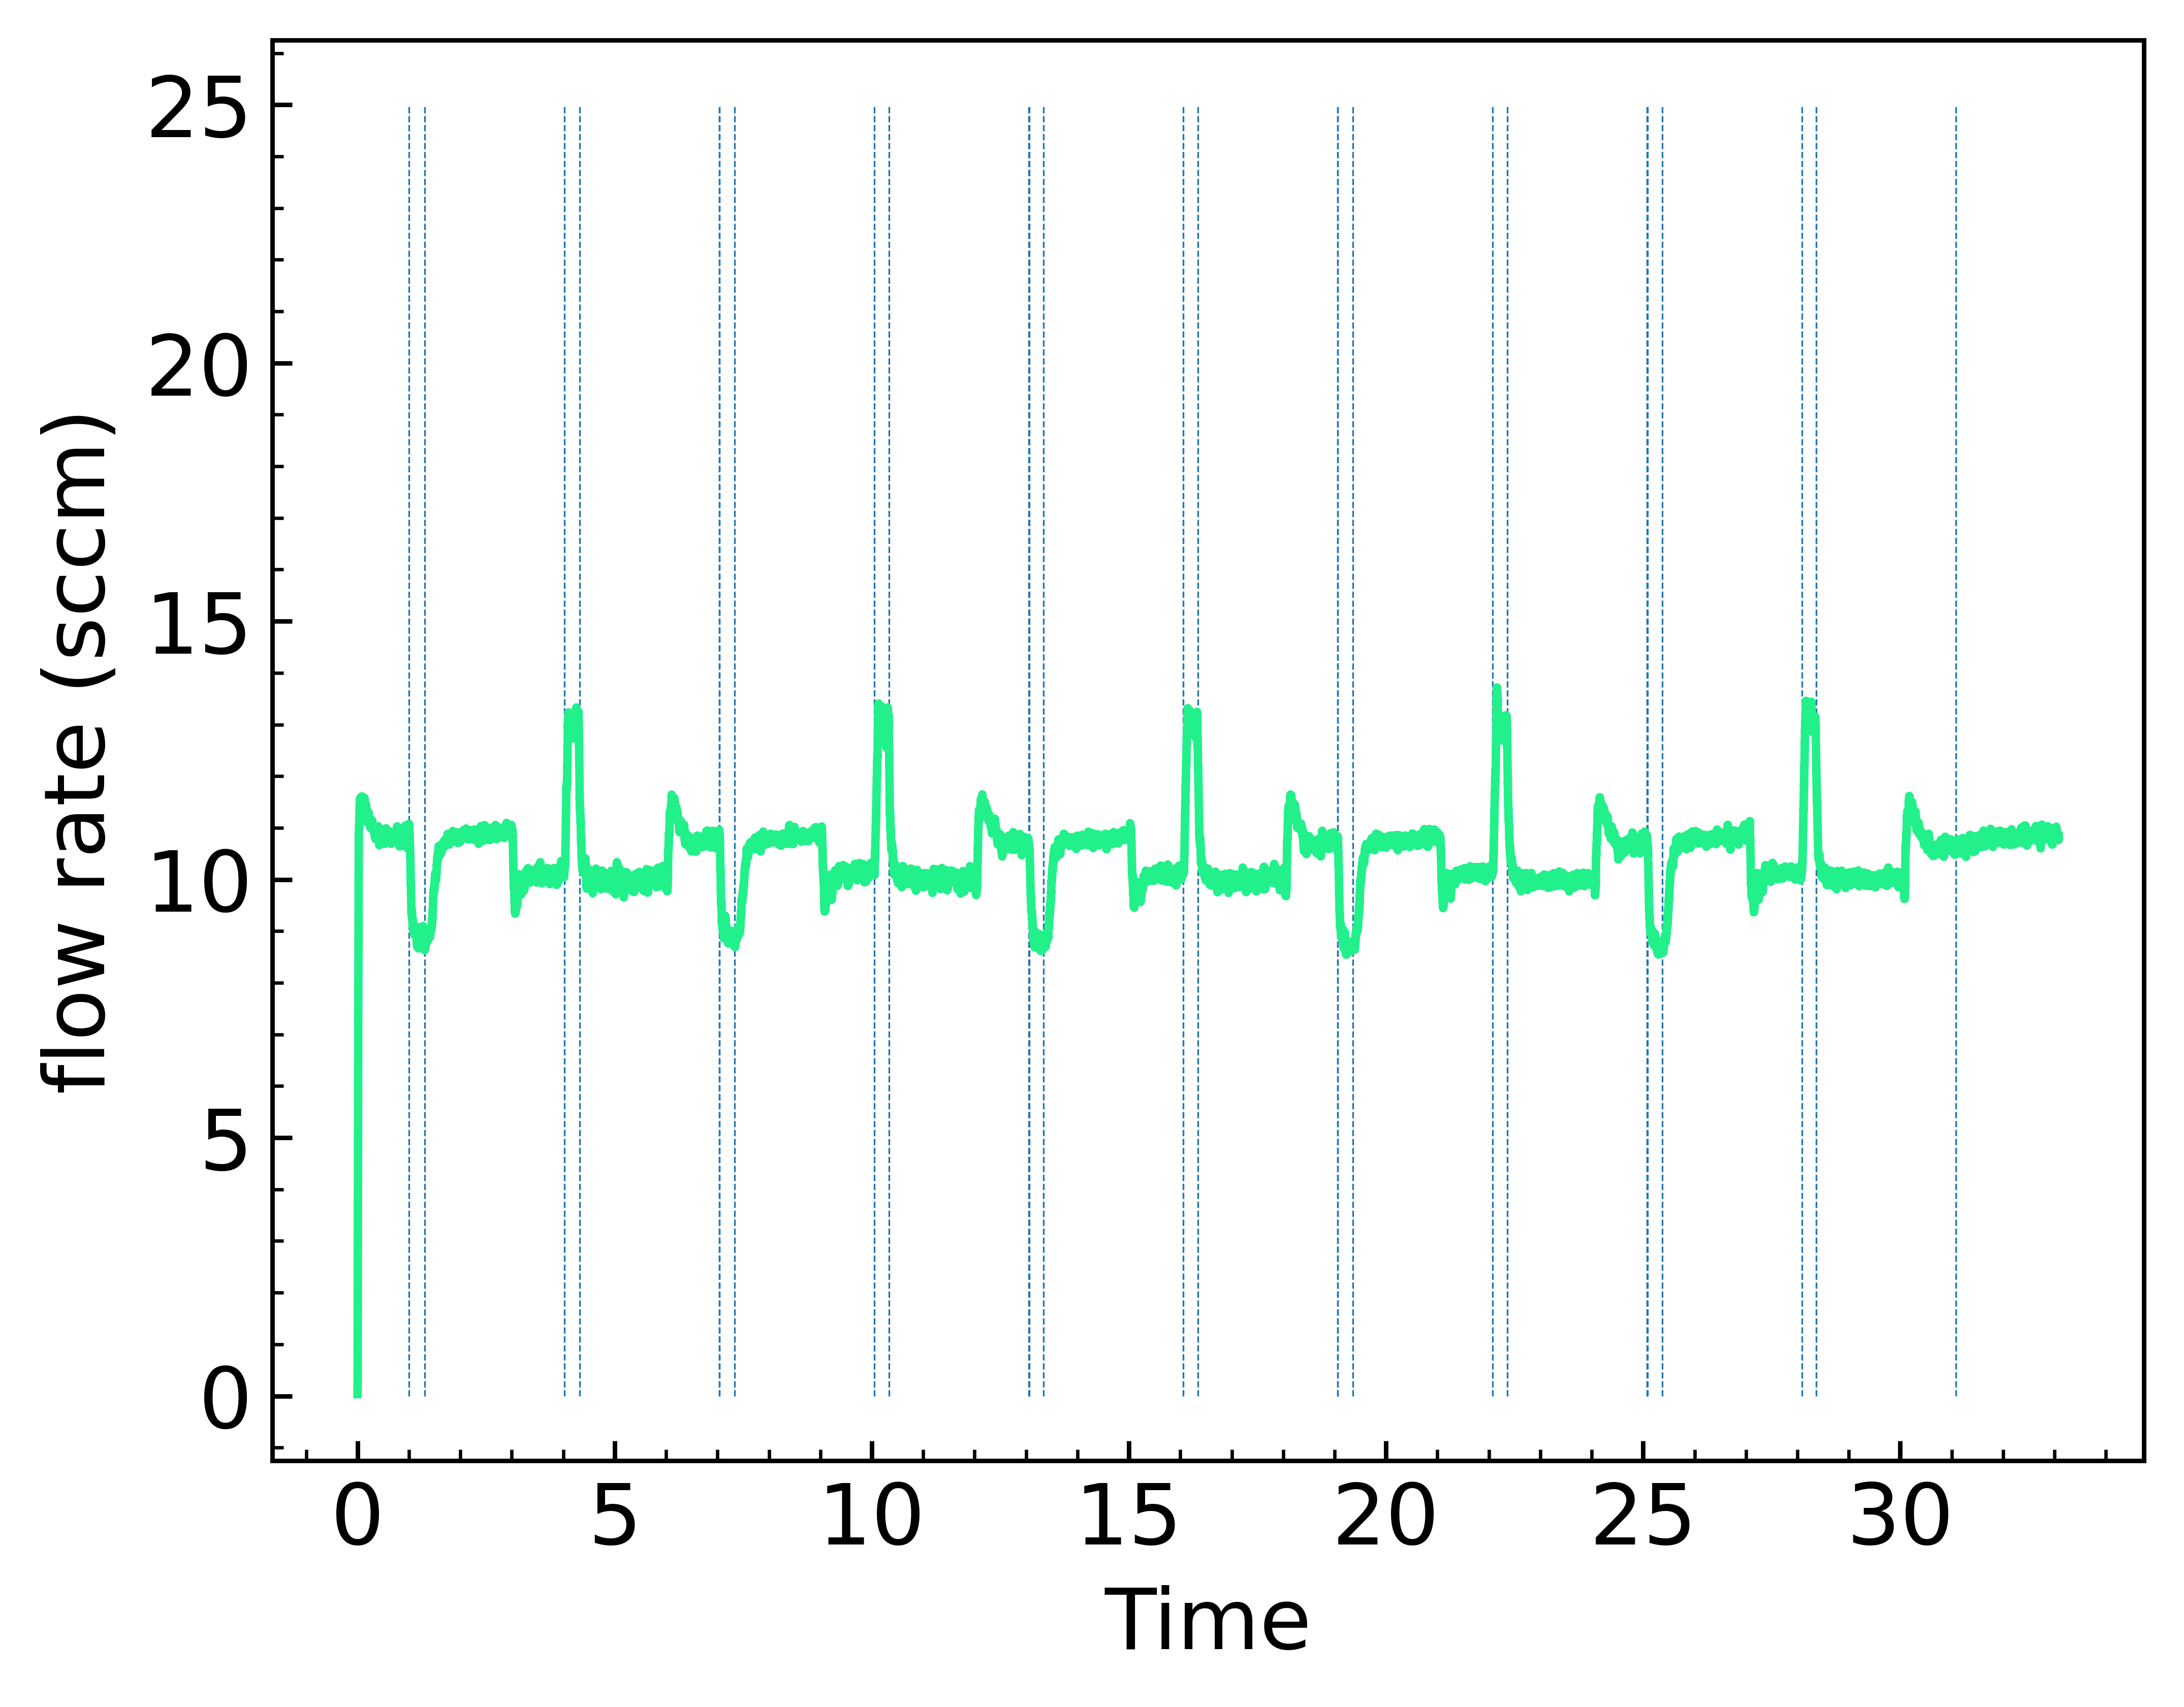

In [20]:
ml = MultipleLocator(5)
plt.figure(figsize=(5.941,4.630),dpi=800,edgecolor='black')
plt.plot(total_df.Time_Delta,total_df['Corrected_Flow_Right_filtered'],color='#22F08A')
for column in time_40_df.columns:
    if column != 'Cycle':
        plt.vlines((time_40_df[column]-total_df.Datetime.iloc[0]).apply(lambda x: x.days*24+x.seconds/3600),ymin=0,ymax=25,linestyles='dashed',linewidth=0.3)

plt.xlabel('Time',fontsize = 15)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
#plt.ylim(-2,3)
#plt.xlim(0,12)
plt.legend(loc=2,frameon=False,fontsize=12)
plt.ylabel('flow rate (sccm)',fontsize = 15)
plt.tick_params(axis='both',which='both',direction='in')
plt.minorticks_on()
plt.tick_params(axis='x')

plt.show()

### 3.2 Plot Baseline for CO2 capture/release

#### 3.2.0 Capture

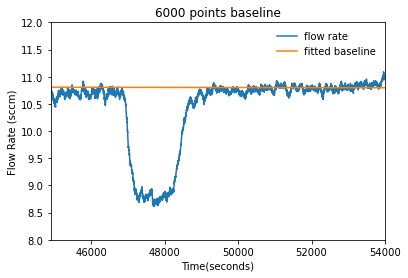

In [34]:
plotting.plot_baseline(amount_3000Baseline_df,total_df = total_df,cycle=2,capture=True,baseline_range=2000,title='6000 points baseline',ymin=8,ymax=12)

#### 3.2.1 Release

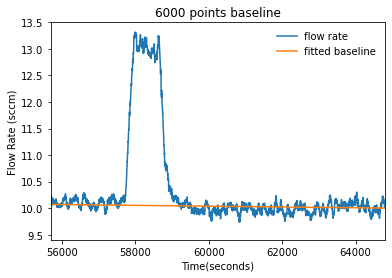

In [33]:
plotting.plot_baseline(amount_3000Baseline_df,total_df = total_df,cycle=2,capture=False,baseline_range=2000,title='6000 points baseline')

### 3.3 Plot Energy Cost

In [25]:
energy_co2_40ma_df = echem_40_ma_energy_df.merge(amount_3000Baseline_df)
energy_co2_40ma_df['deacidification_work(kJ/molCO2)'] = -energy_co2_40ma_df['Charge_Energy']/1000/(energy_co2_40ma_df['Capture_Amount']/24.01/1000)
energy_co2_40ma_df['acidification_work(kJ/molCO2)'] = -energy_co2_40ma_df['Discharge_Energy']/1000/(energy_co2_40ma_df['Outgas_Amount']/24.01/1000)
energy_co2_40ma_df['cycle_work(kJ/molCO2)'] = energy_co2_40ma_df['deacidification_work(kJ/molCO2)']-energy_co2_40ma_df['acidification_work(kJ/molCO2)']
energy_co2_40ma_df['co2_captured/electron'] = -(energy_co2_40ma_df['Capture_Amount']/24.01/1000)/(energy_co2_40ma_df['Charge_Capacity']/96485)
energy_co2_40ma_df['co2_released/electron'] = -(energy_co2_40ma_df['Outgas_Amount']/24.01/1000)/(energy_co2_40ma_df['Discharge_Capacity']/96485)


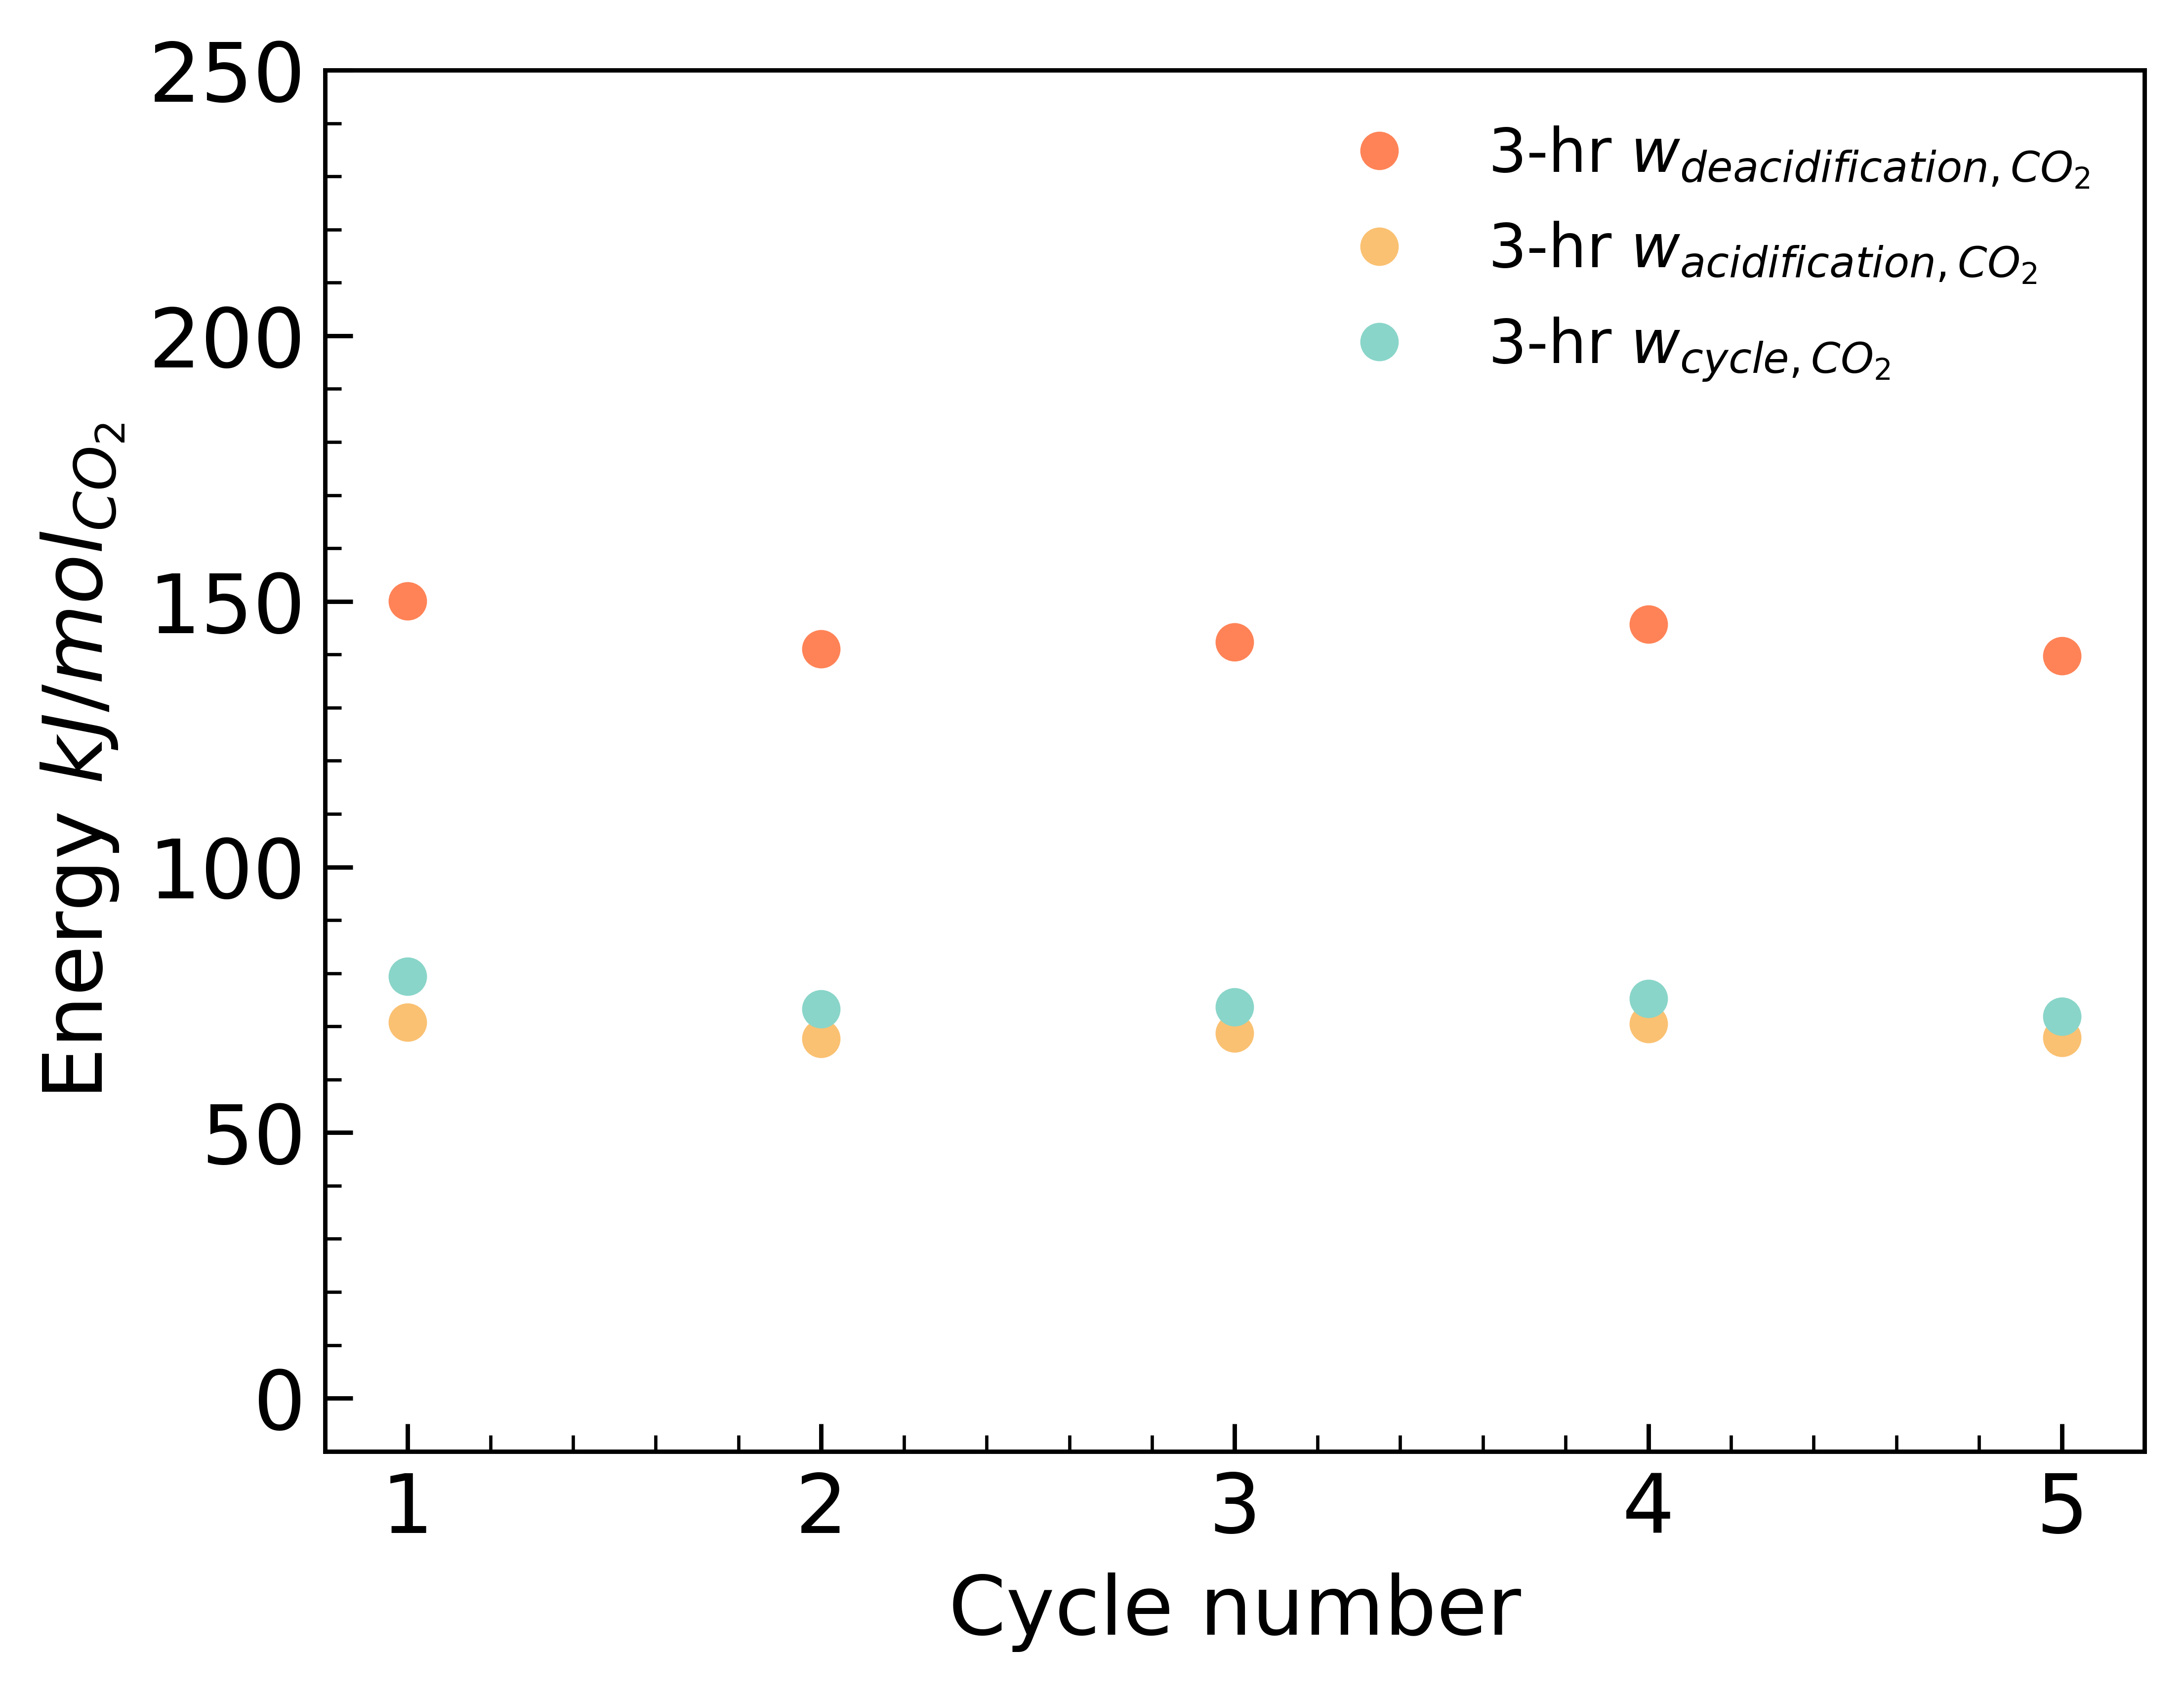

In [26]:
fig,ax = plt.subplots(1,1,figsize=(5.941,4.630),dpi=800,edgecolor='black',sharex=True,gridspec_kw={'hspace': 0.2})

size=15
legend_size=11
#ax[0].set_xlabel("Date Time (Day Hour:Minute)",fontsize = 25)
ax.plot(energy_co2_40ma_df.index+1,np.abs(energy_co2_40ma_df['Charge_Energy']/(energy_co2_40ma_df['Outgas_Amount']*0.95/24.01)),'o',color='#FF8357',label='3-hr $ w_{deacidification, CO_2}$')
ax.plot(energy_co2_40ma_df.index+1,np.abs(energy_co2_40ma_df['Discharge_Energy']/(energy_co2_40ma_df['Outgas_Amount']*0.95/24.01)),'o',color='#FAC172',label='3-hr $ w_{acidification, CO_2}$')
ax.plot(energy_co2_40ma_df.index+1,np.abs((energy_co2_40ma_df['Discharge_Energy']+energy_co2_40ma_df['Charge_Energy'])/(energy_co2_40ma_df['Outgas_Amount']*0.95/24.01)),'o',color='#89D5C9',label ='3-hr $w_{cycle, CO_2}$')


#ax[0].set_xlim(starting_time-delta,ending_time-delta)
ax.tick_params(axis='x')
ax.xaxis.set_tick_params(labelsize=size)
ax.yaxis.set_tick_params(labelsize=size)
ax.set_ylim(-10,250)
#ax[0].set_xlabel("Time (hours)",fontsize = 25)
ax.set_ylabel("Energy $kJ/mol_{CO_2}$",fontsize = size)
#ax.set_xticks([0,5,10,15,20])
ax.tick_params(axis='x',which='minor',direction='in',length=3)
ax.tick_params(axis='x',which='major',direction='in',length=5)

ax.tick_params(axis='y',which='minor',direction='in',length=3)
ax.tick_params(axis='y',which='major',direction='in',length=5)
ax.set_xlabel("Cycle number",fontsize = size)
ax.legend(frameon=False,fontsize=legend_size)
plt.minorticks_on()


### 3.4 Plot DIC vs. pH

In [ ]:
exp_dic = np.array([cycle_2_dic.iloc[0]['DIC_TA'],
                                     cycle_2_dic.iloc[0]['DIC_TA']+np.abs(energy_co2_40ma_df.iloc[1]['Capture_Amount']/24.01/1000/0.011),
                                    (cycle_2_dic.iloc[0]['DIC_TA']+np.abs(energy_co2_40ma_df.iloc[1]['Capture_Amount']/24.01/1000/0.011))/0.33*0.34,
                                    (cycle_2_dic.iloc[0]['DIC_TA']+np.abs(energy_co2_40ma_df.iloc[1]['Capture_Amount']/24.01/1000/0.011))/0.33*0.34 - np.abs(energy_co2_40ma_df['Outgas_Amount'].iloc[1]/24.01/1000/0.011),
                                     cycle_2_dic.iloc[4]['DIC_TA']
                                    ])